In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
S0 = 50
N = 100
T = 5/12
r = 0.1
σ = 0.4
K = 50

In [3]:
def gen_path(M = 1,N=N,T=T,r=r,σ=σ,S0=S0):
    ST = np.zeros((N,M))
    dt = T/N
    dt_rt = np.sqrt(dt)
    ST[0,:] = S0
    for i in range(1,N):
        ST[i,:] = ST[i-1,:] + ST[i-1,:]*r*dt + ST[i-1,:]*dt_rt*σ*np.random.normal(size=M)
    return ST

In [4]:
ST = gen_path(30)

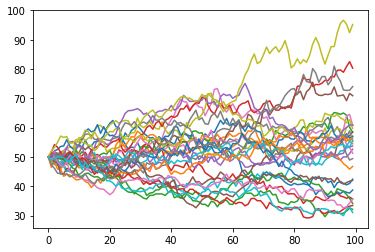

In [5]:
plt.plot(ST);

In [6]:
def euro_call(M = 20,N=N,T=T,r=r,σ=σ,S0=S0,K=K):
    ST = gen_path(M,N,T,r,σ,S0)
    return np.exp(-r*T)*np.mean(np.maximum(ST[-1,:] - K,0))

In [7]:
[euro_call(3000) for i in range(10)]

[6.10737666328287,
 6.331700744065745,
 6.0274500131630795,
 5.807195888482688,
 6.102723630554347,
 6.084432211400398,
 5.83597484274537,
 6.198158383782099,
 6.157644345304177,
 6.350539002803632]

In [9]:
def gen_exact_path(M = 1,N=N,T=T,r=r,σ=σ,S0=S0):
    ST = np.zeros((N,M))
    dt = T/N
    dt_rt = np.sqrt(dt)
    ν = r - 0.5 * σ**2
    ST[0,:] = S0
    for i in range(1,N):
        ST[i,:] = ST[i-1,:]*np.exp(ν*dt + σ*dt_rt*np.random.normal(size=M))
    return ST
    

In [10]:
def euro_call(M = 20,N=N,T=T,r=r,σ=σ,S0=S0,K=K):
    ST = gen_exact_path(M,N,T,r,σ,S0)
    return np.exp(-r*T)*np.mean(np.maximum(ST[-1,:] - K,0))

In [11]:
[euro_call(3000) for i in range(10)]

[5.933505656287725,
 5.833922038168688,
 6.206438584951213,
 6.1403929074064285,
 6.05348173302534,
 6.031287490055346,
 6.059337207627252,
 5.941708247669028,
 6.118607516507375,
 6.1021447957782815]

In [16]:
S0 = 50
σ = 0.4
r = 0.05
K = 50
T = 5/12
N = 100

In [17]:
[euro_call(M=10000,N=100,T=T,r=r,σ=σ,S0=S0) for i in range(10)]

[5.559483057848982,
 5.605144028676923,
 5.596046897174507,
 5.605209723212132,
 5.654852651822833,
 5.59328925936561,
 5.4979218699066115,
 5.615696059595856,
 5.488498678816817,
 5.536510291948193]

In [18]:
def euro_put(M = 20,N=N,T=T,r=r,σ=σ,S0=S0,K=K):
    ST = gen_exact_path(M,N,T,r,σ,S0)
    return np.exp(-r*T)*np.mean(np.maximum(K - ST[-1,:],0))

In [19]:
[euro_put(M=10000,N=100,T=T,r=r,σ=σ,S0=S0) for i in range(10)]

[4.480314719593002,
 4.563565103607289,
 4.580188061682862,
 4.621658627722365,
 4.492406640050289,
 4.5164799840750565,
 4.652420724714348,
 4.498852512393459,
 4.603218978827451,
 4.498111307235204]

In [36]:
def ameri_put(M = 20,N=N,T=T,r=r,σ=σ,S0=S0,K=K):
    ST = gen_exact_path(M,N,T,r,σ,S0)
    dt = T/N
    ST[N-1] = np.maximum(K - ST[N-1,:],0)
    for i in range(N-2,-1,-1):
        #idx = np.argwhere(ST[i+1])
        #print(np.ravel(V[idx]))
        my_poly = np.poly1d(np.polyfit(np.ravel(ST[i]),np.exp(-r*dt)*np.ravel(ST[i+1]),7))
        ST[i] = np.maximum(K - ST[i],my_poly(ST[i]))
        #ST[i] = np.maximum(ST[i],0)
        #print(ST[i])
    return np.mean(np.exp(-r*dt)*ST[1])

In [25]:
ms = []
for i in [5,10,50,100,200,300,400,500,600,700,800]:
    ms.append(ameri_put(2000,N=i))

<ipython-input-25-acb4e3adfd2e>:3: RankWarning: Polyfit may be poorly conditioned
  ms.append(ameri_put(2000,N=i))
<ipython-input-25-acb4e3adfd2e>:3: RankWarning: Polyfit may be poorly conditioned
  ms.append(ameri_put(2000,N=i))
<ipython-input-25-acb4e3adfd2e>:3: RankWarning: Polyfit may be poorly conditioned
  ms.append(ameri_put(2000,N=i))
<ipython-input-25-acb4e3adfd2e>:3: RankWarning: Polyfit may be poorly conditioned
  ms.append(ameri_put(2000,N=i))
<ipython-input-25-acb4e3adfd2e>:3: RankWarning: Polyfit may be poorly conditioned
  ms.append(ameri_put(2000,N=i))
<ipython-input-25-acb4e3adfd2e>:3: RankWarning: Polyfit may be poorly conditioned
  ms.append(ameri_put(2000,N=i))
<ipython-input-25-acb4e3adfd2e>:3: RankWarning: Polyfit may be poorly conditioned
  ms.append(ameri_put(2000,N=i))
<ipython-input-25-acb4e3adfd2e>:3: RankWarning: Polyfit may be poorly conditioned
  ms.append(ameri_put(2000,N=i))
<ipython-input-25-acb4e3adfd2e>:3: RankWarning: Polyfit may be poorly conditione

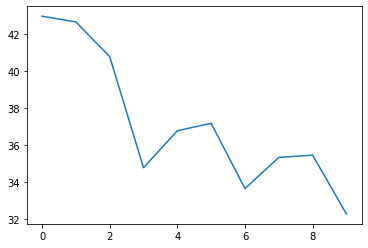

In [26]:
plt.plot(ms[1:])

In [48]:
ms = [ameri_put(500,1000,1,0.06,0.4,42,40) for i in range(50)]

<ipython-input-48-9dafc1e440e4>:1: RankWarning: Polyfit may be poorly conditioned
  ms = [ameri_put(500,1000,1,0.06,0.4,42,40) for i in range(50)]
<ipython-input-48-9dafc1e440e4>:1: RankWarning: Polyfit may be poorly conditioned
  ms = [ameri_put(500,1000,1,0.06,0.4,42,40) for i in range(50)]
<ipython-input-48-9dafc1e440e4>:1: RankWarning: Polyfit may be poorly conditioned
  ms = [ameri_put(500,1000,1,0.06,0.4,42,40) for i in range(50)]
<ipython-input-48-9dafc1e440e4>:1: RankWarning: Polyfit may be poorly conditioned
  ms = [ameri_put(500,1000,1,0.06,0.4,42,40) for i in range(50)]
<ipython-input-48-9dafc1e440e4>:1: RankWarning: Polyfit may be poorly conditioned
  ms = [ameri_put(500,1000,1,0.06,0.4,42,40) for i in range(50)]
<ipython-input-48-9dafc1e440e4>:1: RankWarning: Polyfit may be poorly conditioned
  ms = [ameri_put(500,1000,1,0.06,0.4,42,40) for i in range(50)]
<ipython-input-48-9dafc1e440e4>:1: RankWarning: Polyfit may be poorly conditioned
  ms = [ameri_put(500,1000,1,0.06,0.

<ipython-input-48-9dafc1e440e4>:1: RankWarning: Polyfit may be poorly conditioned
  ms = [ameri_put(500,1000,1,0.06,0.4,42,40) for i in range(50)]
<ipython-input-48-9dafc1e440e4>:1: RankWarning: Polyfit may be poorly conditioned
  ms = [ameri_put(500,1000,1,0.06,0.4,42,40) for i in range(50)]
<ipython-input-48-9dafc1e440e4>:1: RankWarning: Polyfit may be poorly conditioned
  ms = [ameri_put(500,1000,1,0.06,0.4,42,40) for i in range(50)]
<ipython-input-48-9dafc1e440e4>:1: RankWarning: Polyfit may be poorly conditioned
  ms = [ameri_put(500,1000,1,0.06,0.4,42,40) for i in range(50)]
<ipython-input-48-9dafc1e440e4>:1: RankWarning: Polyfit may be poorly conditioned
  ms = [ameri_put(500,1000,1,0.06,0.4,42,40) for i in range(50)]
<ipython-input-48-9dafc1e440e4>:1: RankWarning: Polyfit may be poorly conditioned
  ms = [ameri_put(500,1000,1,0.06,0.4,42,40) for i in range(50)]
<ipython-input-48-9dafc1e440e4>:1: RankWarning: Polyfit may be poorly conditioned
  ms = [ameri_put(500,1000,1,0.06,0.

<ipython-input-48-9dafc1e440e4>:1: RankWarning: Polyfit may be poorly conditioned
  ms = [ameri_put(500,1000,1,0.06,0.4,42,40) for i in range(50)]
<ipython-input-48-9dafc1e440e4>:1: RankWarning: Polyfit may be poorly conditioned
  ms = [ameri_put(500,1000,1,0.06,0.4,42,40) for i in range(50)]
<ipython-input-48-9dafc1e440e4>:1: RankWarning: Polyfit may be poorly conditioned
  ms = [ameri_put(500,1000,1,0.06,0.4,42,40) for i in range(50)]
<ipython-input-48-9dafc1e440e4>:1: RankWarning: Polyfit may be poorly conditioned
  ms = [ameri_put(500,1000,1,0.06,0.4,42,40) for i in range(50)]
<ipython-input-48-9dafc1e440e4>:1: RankWarning: Polyfit may be poorly conditioned
  ms = [ameri_put(500,1000,1,0.06,0.4,42,40) for i in range(50)]
<ipython-input-48-9dafc1e440e4>:1: RankWarning: Polyfit may be poorly conditioned
  ms = [ameri_put(500,1000,1,0.06,0.4,42,40) for i in range(50)]
<ipython-input-48-9dafc1e440e4>:1: RankWarning: Polyfit may be poorly conditioned
  ms = [ameri_put(500,1000,1,0.06,0.

In [49]:
np.mean(ms)

4.913764381120957

In [29]:
ls = [euro_put(500,500,2,0.06,0.4,42,40) for i in range(20)]

In [30]:
np.mean(ls)

5.687010536135917

In [45]:
ms

[6.8183362950233075,
 7.076555533531897,
 6.678325094517326,
 6.18577742883431,
 6.347681921810558,
 6.8873220135162,
 6.372196890765304,
 6.266818816972513,
 7.634504078380393,
 6.600603918535785,
 7.1979492930010895,
 7.228981715244634,
 7.1328517515064584,
 7.046360282407852,
 6.9289821753978424,
 7.005645357767708,
 6.899345093381815,
 7.002374506125177,
 6.624585822038366,
 6.5205427089868415,
 6.865617199838152,
 7.580926667625673,
 6.713913582298093,
 6.605588640901293,
 7.306213274432065,
 7.786215876123299,
 7.524927659665058,
 6.122486895691517,
 7.253097261505669,
 8.91491326150431,
 7.953137783884844,
 6.8546175351189795,
 6.6819234886156735,
 7.7807850625024955,
 7.804867407223868,
 7.080181122487618,
 7.8727836085573975,
 5.417815485134517,
 6.920731099361563,
 5.553583264899354,
 7.326336515626159,
 6.232524421101427,
 6.258499415986763,
 7.369978025800607,
 6.034977102413283,
 6.896830111970725,
 6.562274546156188,
 6.928862726974211,
 6.568681858436281,
 6.333874516705

In [32]:
range?